## Data Wrangling for a polynomial regression model
Data wrangled from Excel file `BrazilCOVIDData.xlsx`




# Model based on:

David N. Prata, Waldecy Rodrigues, Paulo H. Bermejo. Temperature significantly
changes COVID-19 transmission in (sub)tropical cities of Brazil. Science of The Total
Environment. Volume 729. 2020. 138862. ISSN 0048-9697.
https://doi.org/10.1016/j.scitotenv.2020.138862.

# Model Parameters:

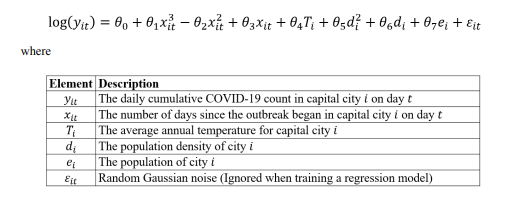

In [27]:
# ignoring warning to ensure proper execution
import warnings
warnings.filterwarnings('ignore') 

In [28]:
# Common Imports
import pandas as pd
import numpy as np

In [29]:
#creating an Excel File object
xls = pd.ExcelFile('BrazilCOVIDData.xlsx')

In [30]:
#Creating Data Frames for each sheet of Brazil Covid Data
#this is the largest excel file, so it's seperated from the others
brazil_covid = pd.read_excel(xls, 'Brazil Covid-19 data')
brazil_covid = brazil_covid.applymap(lambda s: s.upper() if type(s) == str else s)

In [31]:
#reading the rest of the relevant data sheets from the file
temp_by_state = pd.read_excel(xls, "Temperature by State")
brazil_states = pd.read_excel(xls, "Brazil State Stats",header =4)
city_area = pd.read_excel(xls, "City area")

In [32]:
#setting all string data to uppercase to allow for easier data wrangling
temp_by_state = temp_by_state.applymap(lambda s: s.upper() if type(s) == str else s)
brazil_states = brazil_states.applymap(lambda s: s.upper() if type(s) == str else s)
city_area = city_area.applymap(lambda s: s.upper() if type(s) == str else s)

In [33]:
# Dropping unnecessary header data and resting the index to 0 through n-1
#renaming abbreviation column for easier merging with temperature data
#renaming Population to pop
brazil_states = brazil_states.drop([0,1]).reset_index(drop=True).rename(columns = {"Common Two Letter":"STATE_ABBR"})


In [34]:
# removing non-capitol cities from Temperature data and renaming the annual temperature to temp
temp_by_state = temp_by_state.loc[temp_by_state.IS_CAPITOL == 'Y'].reset_index(drop=True).rename(columns={"ANNUAL":"temp"})

In [35]:
#creating a list of the Capitol Cities from the filtered Temp Data
capitol_cities = temp_by_state.CITY

In [36]:
#creating a dataframe of Capitol Cities and their respective state
#renaming columns for easier merging with brazil covid data
capitol_state_combo = temp_by_state[["CITY","STATE_ABBR"]].rename(columns ={"CITY":"Municipality","STATE_ABBR":"State"})

In [37]:
#inner joining the brazil_states data with the temperature data
capitol_data = brazil_states.merge(temp_by_state, on = 'STATE_ABBR', how = 'inner')

In [38]:
#reducing the Brazil Covid Data to only the Capital Cities
#merging with capitol state combo to ensure only capitol cities with the correct state label are included
#data is sorted first by State in alphabetical order then dates sequentially
brazil_covid_reduced = brazil_covid.copy()
brazil_covid_reduced = brazil_covid_reduced.merge(capitol_state_combo).sort_values(by=['State','Date'])

In [39]:
#ensuring only 151 days of data for each city
brazil_covid_reduced.groupby("Municipality").count()

Region  State  State-code  Municipality-code  \
Municipality                                                   
ARACAJU            151    151         151                151   
BELO HORIZONTE     151    151         151                151   
BELÉM              151    151         151                151   
BOA VISTA          151    151         151                151   
BRASÍLIA           151    151         151                151   
CAMPO GRANDE       151    151         151                151   
CUIABÁ             151    151         151                151   
CURITIBA           151    151         151                151   
FLORIANÓPOLIS      151    151         151                151   
FORTALEZA          151    151         151                151   
GOIÂNIA            151    151         151                151   
JOÃO PESSOA        151    151         151                151   
MACAPÁ             151    151         151                151   
MACEIÓ             151    151         151                151   
MANAUS             151    151         151                151   
NATAL              151    151         151                151   
PALMAS             151    151         151                151   
PORTO ALEGRE       151    151         151                151   
PORTO VELHO        151    151         151                151   
RECIFE             151    151         151                151   
RIO BRANCO         151    151         151                151   
RIO DE JANEIRO     151    151         151                151   
SALVADOR           151    151         151                151   
SÃO LUÍS           151    151         151                151   
SÃO PAULO          151    151         151                151   
TERESINA           151    151         151                151   
VITÓRIA            151    151         151                151   

                Health-region-code  Health-region-name  Date  Week #  \
Municipality                                                           
ARACAJU                        151                 151   151     151   
BELO HORIZONTE                 151                 151   151     151   
BELÉM                          151                 151   151     151   
BOA VISTA                      151                 151   151     151   
BRASÍLIA                       151                 151   151     151   
CAMPO GRANDE                   151                 151   151     151   
CUIABÁ                         151                 151   151     151   
CURITIBA                       151                 151   151     151   
FLORIANÓPOLIS                  151                 151   151     151   
FORTALEZA                      151                 151   151     151   
GOIÂNIA                        151                 151   151     151   
JOÃO PESSOA                    151                 151   151     151   
MACAPÁ                         151                 151   151     151   
MACEIÓ                         151                 151   151     151   
MANAUS                         151                 151   151     151   
NATAL                          151                 151   151     151   
PALMAS                         151                 151   151     151   
PORTO ALEGRE                   151                 151   151     151   
PORTO VELHO                    151                 151   151     151   
RECIFE                         151                 151   151     151   
RIO BRANCO                     151                 151   151     151   
RIO DE JANEIRO                 151                 151   151     151   
SALVADOR                       151                 151   151     151   
SÃO LUÍS                       151                 151   151     151   
SÃO PAULO                      151                 151   151     151   
TERESINA                       151                 151   151     151   
VITÓRIA                        151                 151   151     151   

                Population as of 2019  Accumulated cases  New cases  \

In [40]:
#creating a days since outbreak column
brazil_covid_reduced["days"] = np.nan

In [41]:
# for each city, adding values to the days column
data_grouped = brazil_covid_reduced.groupby("Municipality")
for name, group in data_grouped:
  brazil_covid_reduced["days"].loc[group.index[:151]] = range(151)




In [42]:
# filtering out the irrelevant columns and renaming for an easier merge
brazil_covid_reduced = brazil_covid_reduced[["State",'Population as of 2019','Accumulated cases','days']].rename(columns={"State":"STATE_ABBR", "Population as of 2019":"pop"})

In [43]:
#merging all the data
full_merge = brazil_covid_reduced.merge(capitol_data,how='inner', on ="STATE_ABBR")

In [44]:
#changing population column from string to float
full_merge["pop"] = pd.to_numeric(full_merge["pop"], downcast = "float")

In [45]:
# adding the days cubes, days square, population density and population density squared feature columns
full_merge["days_cube"] = full_merge["days"]**3.0
full_merge["days_sq"] = full_merge["days"]**2.0
full_merge["pop_dense"]=full_merge['pop']/full_merge['Size']
full_merge["pop_dense_sq"] = full_merge.pop_dense**2.0

In [46]:
#taking the relevant features columns from full_merge
features = full_merge[["days_cube","days_sq","days","temp","pop_dense_sq","pop_dense","pop"]]

# taking the Accumulated cases column from full merge as the training response
response = full_merge[["Accumulated cases"]]

## Featrues for the model

In [47]:
features.head()

days_cube  days_sq  days  temp pop_dense_sq pop_dense       pop
0        0.0      0.0   0.0  76.6     7.126371  2.669526  407319.0
1        1.0      1.0   1.0  76.6     7.126371  2.669526  407319.0
2        8.0      4.0   2.0  76.6     7.126371  2.669526  407319.0
3       27.0      9.0   3.0  76.6     7.126371  2.669526  407319.0
4       64.0     16.0   4.0  76.6     7.126371  2.669526  407319.0

## Responses for the training set

In [48]:
response.head()

Accumulated cases
0                  0
1                 25
2                 31
3                 35
4                 34

## Sample Implementation

In [49]:
#creating a test and training set
from sklearn.model_selection import train_test_split
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size = 0.2)

In [50]:
#Logistic Regression Model Fitting
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(features_train,response_train)

LogisticRegression()

In [51]:
# Finding the model predictions for the test set
cases_predictions = log_reg.predict(features_test)

In [52]:
#Evaluating model with mean_absolute_error
from sklearn.metrics import mean_absolute_error

log_mae = mean_absolute_error(response_test, cases_predictions)
log_mae

53495.134803921566

Quite a large error.  The model is underfitted.  Features may not be representative enough and/or the model is not powerful enough among other potential reasons.